## GOAL-IMPLEMENT A LINEAR REGRESSION MODEL TO PREDICT THE PRICES OF HOUSE BASED ON THEIR SQUARE FOOTAGE AND NUMBER OF BEDROOMS AND BATHROOMS.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
df=pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
import seaborn as sns
import matplotlib .pyplot as plt

In [4]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

#### Checking The Percentage Of Missing Values

In [6]:
### original shape of dataframe
print("original shape  : ",df.shape)

#checking for missing values
for i in df.columns:
    print(i,"  ==",df[i].isnull().sum()/df.shape[0])
#dropping columns which are having more than 30 % missing values 
for i in df.columns:
    if df[i].isnull().sum()/df.shape[0]>=0.30:
        df.drop(columns=[i],inplace=True) 
print("========================")
#shape after removing columns with large missing values  
print("Current shape   ",df.shape)

original shape  :  (1460, 75)
Id   == 0.0
MSSubClass   == 0.0
MSZoning   == 0.0
LotFrontage   == 0.1773972602739726
LotArea   == 0.0
Street   == 0.0
LotShape   == 0.0
LandContour   == 0.0
Utilities   == 0.0
LotConfig   == 0.0
LandSlope   == 0.0
Neighborhood   == 0.0
Condition1   == 0.0
Condition2   == 0.0
BldgType   == 0.0
HouseStyle   == 0.0
OverallQual   == 0.0
OverallCond   == 0.0
YearBuilt   == 0.0
YearRemodAdd   == 0.0
RoofStyle   == 0.0
RoofMatl   == 0.0
Exterior1st   == 0.0
Exterior2nd   == 0.0
MasVnrArea   == 0.005479452054794521
ExterQual   == 0.0
ExterCond   == 0.0
Foundation   == 0.0
BsmtQual   == 0.025342465753424658
BsmtCond   == 0.025342465753424658
BsmtExposure   == 0.026027397260273973
BsmtFinType1   == 0.025342465753424658
BsmtFinSF1   == 0.0
BsmtFinType2   == 0.026027397260273973
BsmtFinSF2   == 0.0
BsmtUnfSF   == 0.0
TotalBsmtSF   == 0.0
Heating   == 0.0
HeatingQC   == 0.0
CentralAir   == 0.0
Electrical   == 0.0006849315068493151
1stFlrSF   == 0.0
2ndFlrSF   == 0.0
L

In [7]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


#### Missing Value Treatment

In [8]:
df["SalePrice"].dtype

dtype('int64')

In [9]:
for i in df.columns: 
    if df[i].dtype =="int64" or df[i].dtype=="float64":
        df[i].fillna(df[i].median(),inplace=True)
    else:
        df[i].fillna(df[i].mode()[0],inplace=True)

In [10]:
for i in df.columns: 
    print(df[i].isnull().sum())

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


#### Visualizing The Relationship of different features with the Sale Price 

In [11]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'Enclo

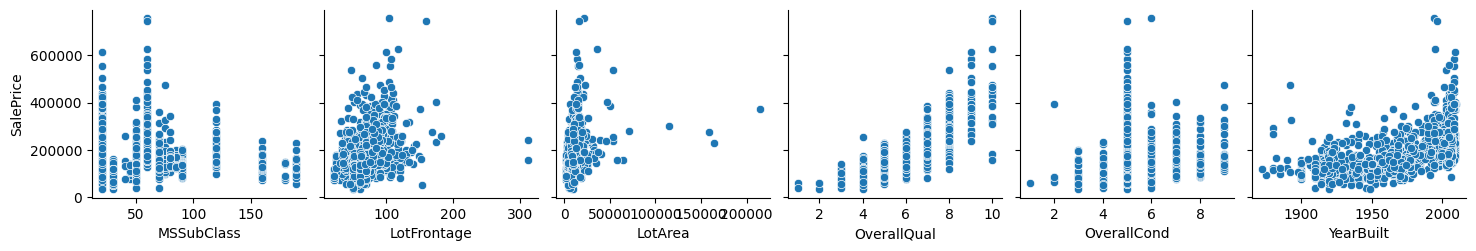

In [12]:
sns.pairplot(data=df,x_vars=["MSSubClass","LotFrontage","LotArea","OverallQual",
                            "OverallCond","YearBuilt"],y_vars="SalePrice")

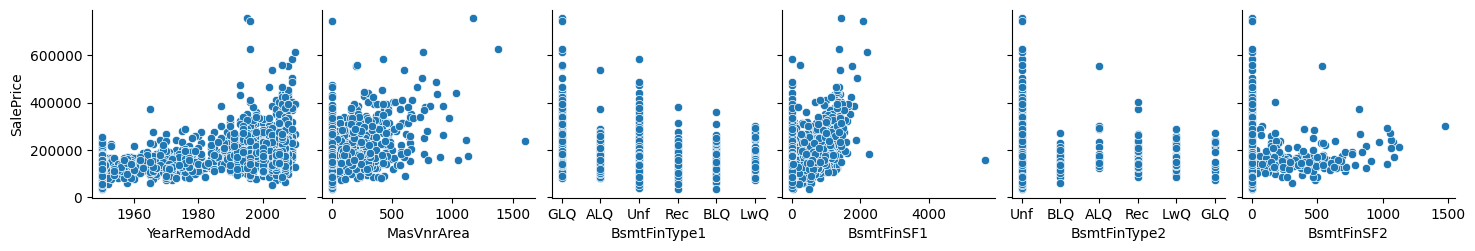

In [13]:
sns.pairplot(data=df,x_vars=["YearRemodAdd","MasVnrArea",'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 
                             'BsmtFinSF2'],y_vars="SalePrice")

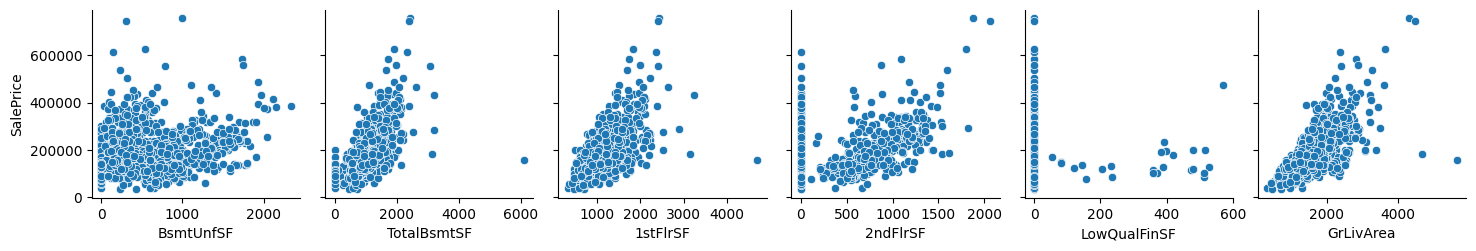

In [14]:
sns.pairplot(data=df,x_vars=["BsmtUnfSF","TotalBsmtSF","1stFlrSF",
                            "2ndFlrSF","LowQualFinSF","GrLivArea"],y_vars="SalePrice")

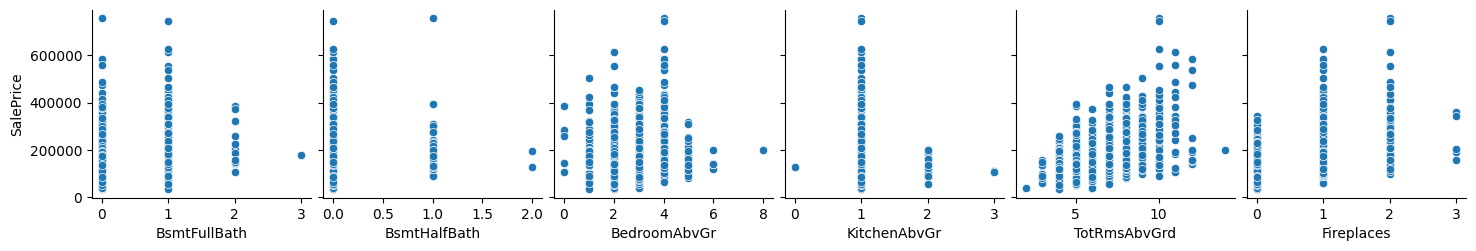

In [15]:
sns.pairplot(data=df,x_vars=["BsmtFullBath","BsmtHalfBath","BedroomAbvGr",
                            "KitchenAbvGr","TotRmsAbvGrd","Fireplaces"],y_vars="SalePrice")

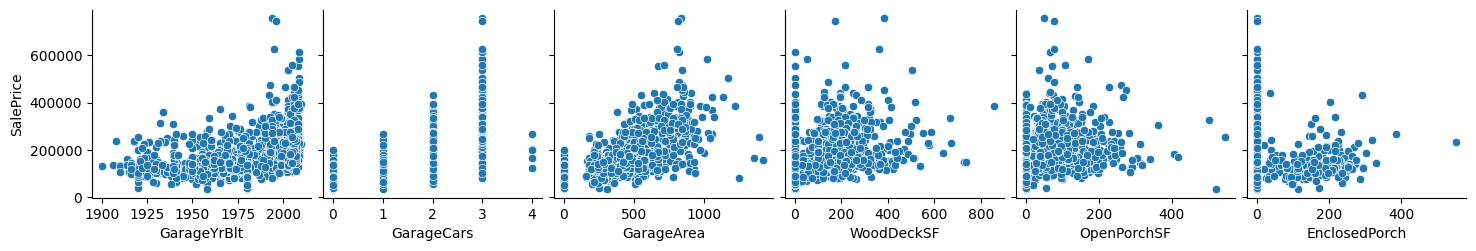

In [16]:
sns.pairplot(data=df,x_vars=["GarageYrBlt","GarageCars","GarageArea",
                            "WoodDeckSF","OpenPorchSF","EnclosedPorch"],y_vars="SalePrice")

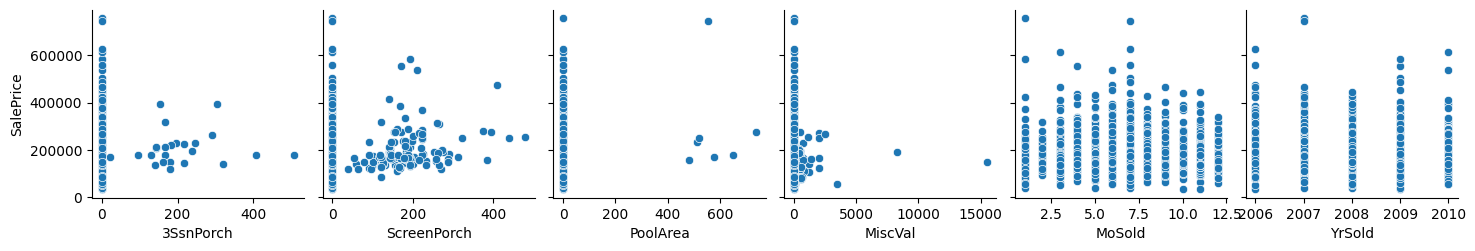

In [17]:
sns.pairplot(data=df,x_vars=["3SsnPorch","ScreenPorch","PoolArea",
                            "MiscVal","MoSold","YrSold"],y_vars="SalePrice")

From the above visualization we can see that the features LotFrontage,LotArea,YearRemodAdd,
MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,LowQualFinSF,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold are having no relationship with the sale price Hence we will drop them.

In [18]:
df.drop(columns=["Id","LotFrontage","LotArea","YearRemodAdd","MasVnrArea","BsmtFinSF1"
                 ,"BsmtFinSF2","BsmtUnfSF","LowQualFinSF","GarageYrBlt","GarageArea",
                 "WoodDeckSF","OpenPorchSF","EnclosedPorch","3SsnPorch",
                 "ScreenPorch","PoolArea","MiscVal","MoSold","YrSold"],inplace=True)

In [19]:
df.shape

(1460, 55)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 55 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSSubClass     1460 non-null   int64 
 1   MSZoning       1460 non-null   object
 2   Street         1460 non-null   object
 3   LotShape       1460 non-null   object
 4   LandContour    1460 non-null   object
 5   Utilities      1460 non-null   object
 6   LotConfig      1460 non-null   object
 7   LandSlope      1460 non-null   object
 8   Neighborhood   1460 non-null   object
 9   Condition1     1460 non-null   object
 10  Condition2     1460 non-null   object
 11  BldgType       1460 non-null   object
 12  HouseStyle     1460 non-null   object
 13  OverallQual    1460 non-null   int64 
 14  OverallCond    1460 non-null   int64 
 15  YearBuilt      1460 non-null   int64 
 16  RoofStyle      1460 non-null   object
 17  RoofMatl       1460 non-null   object
 18  Exterior1st    1460 non-null

#### visualizing the Relationship between Sale Price and Categorical features

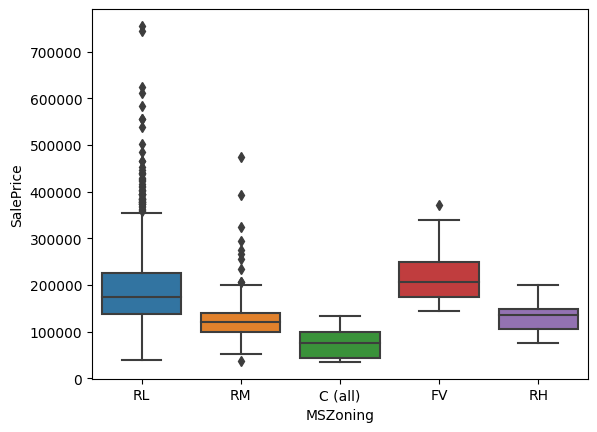

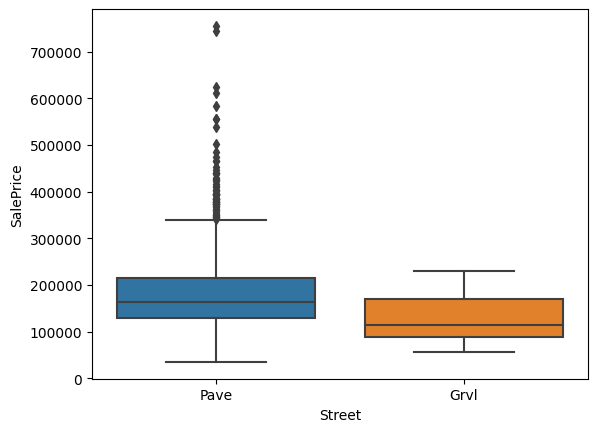

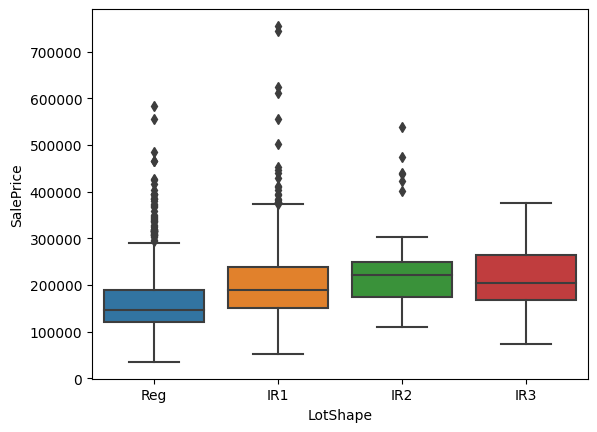

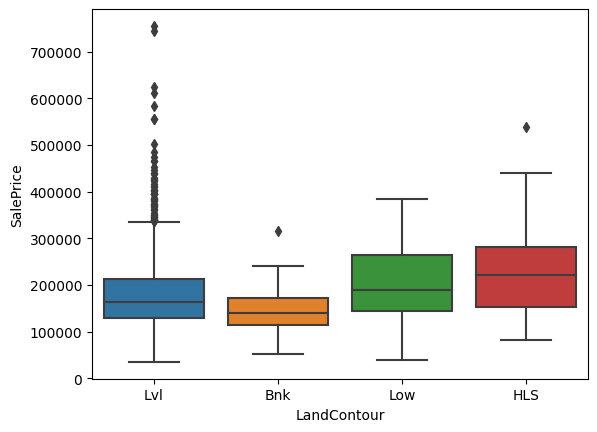

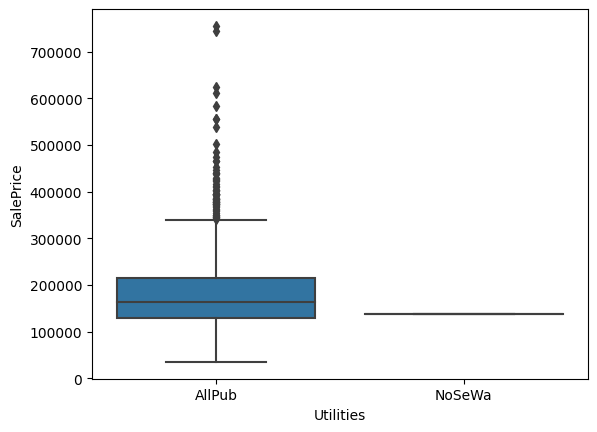

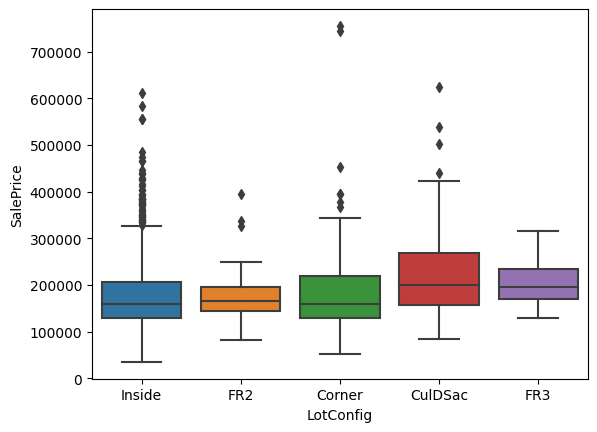

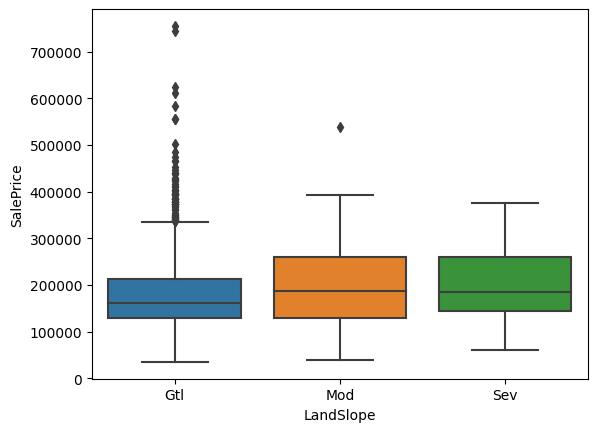

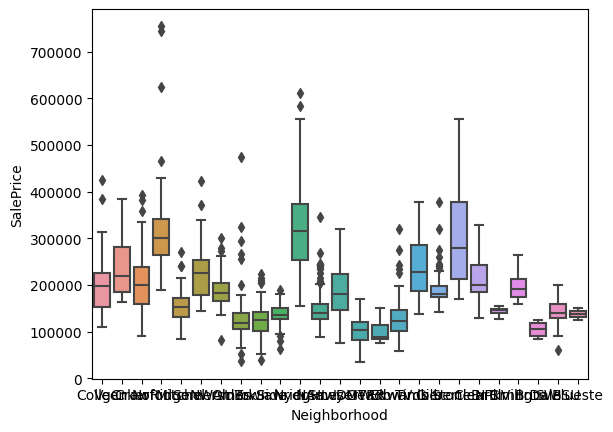

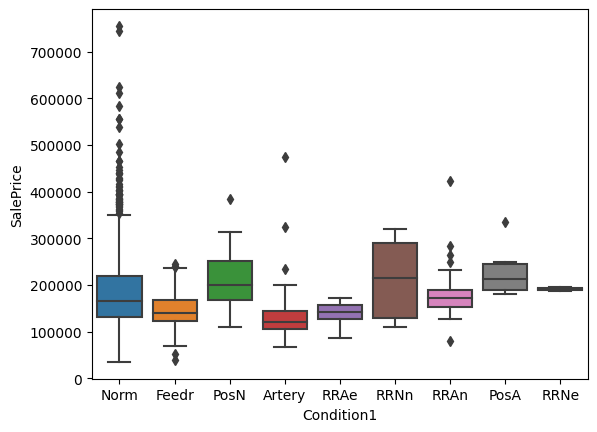

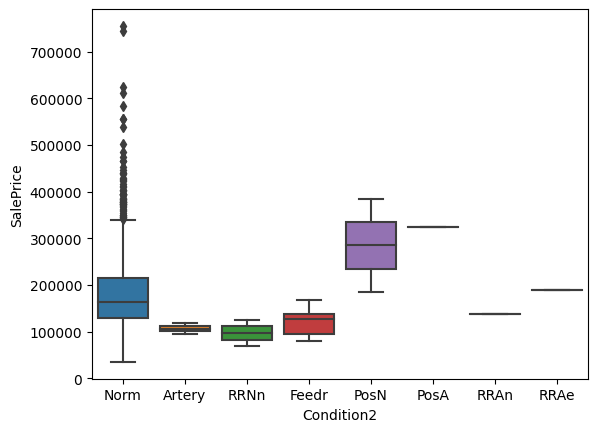

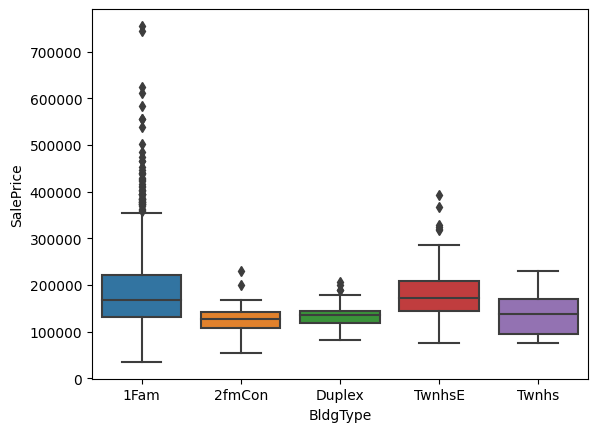

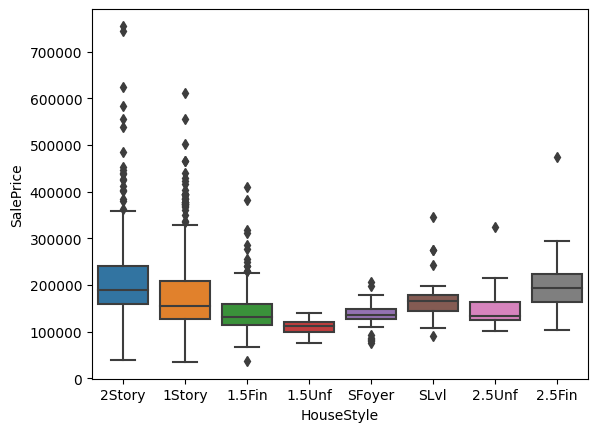

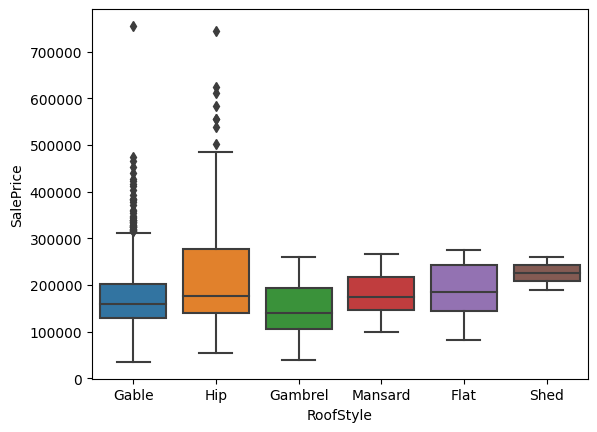

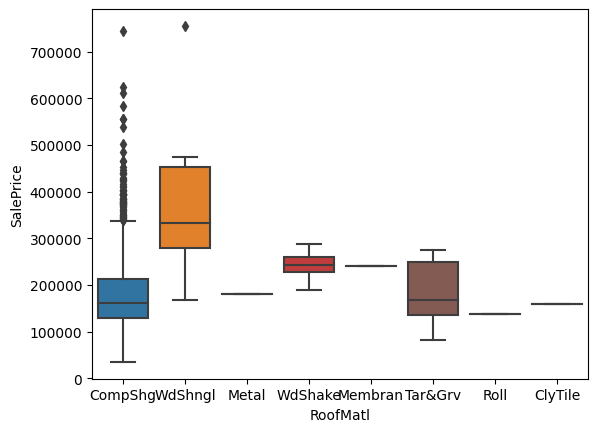

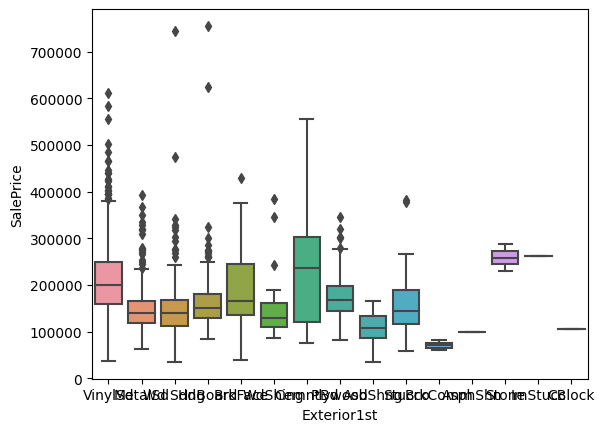

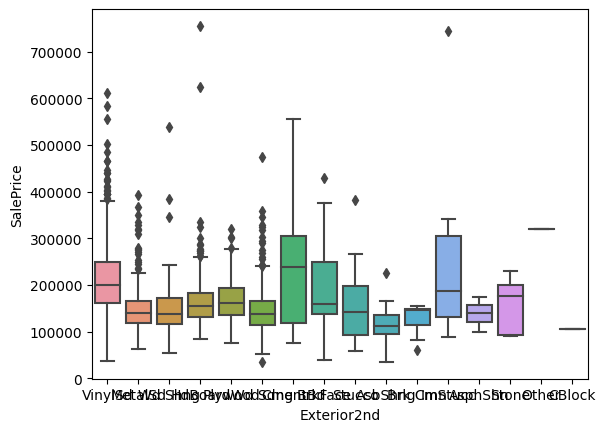

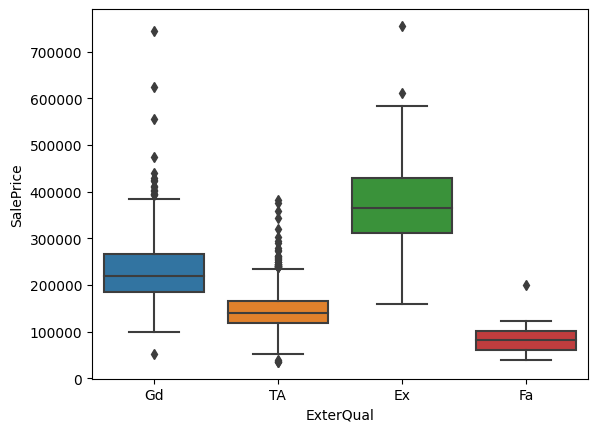

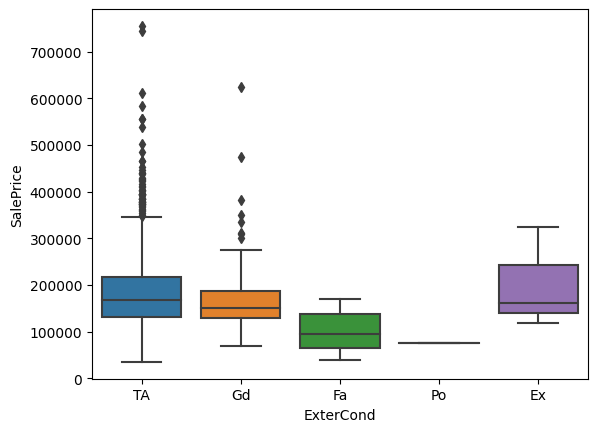

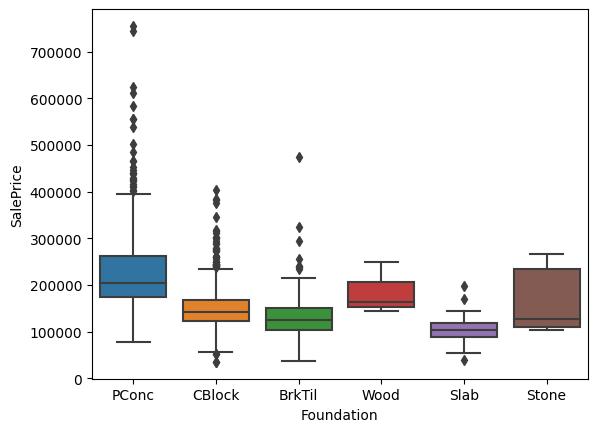

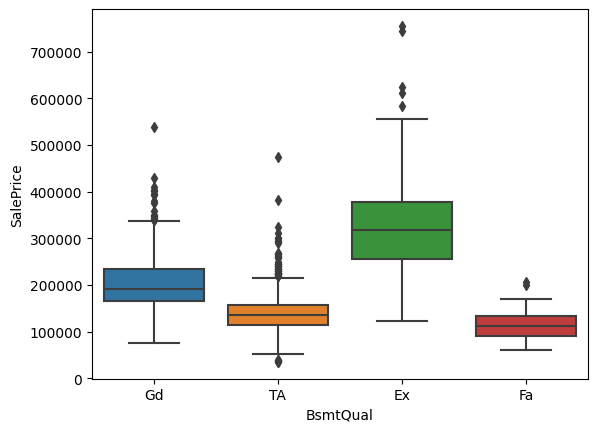

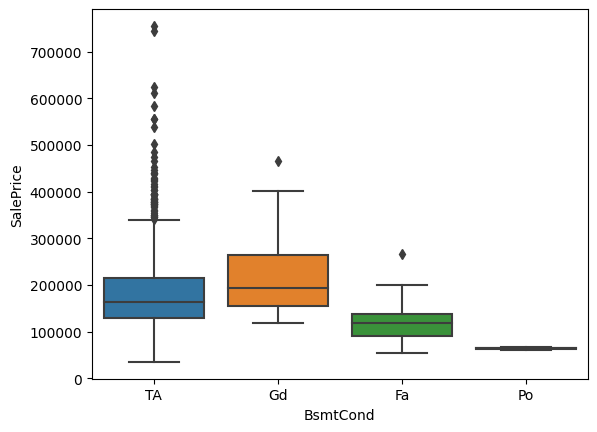

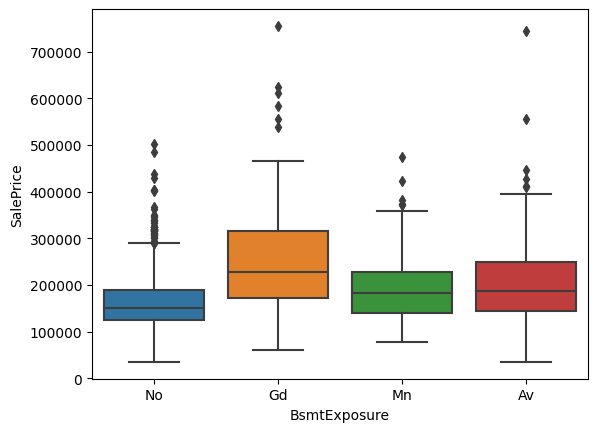

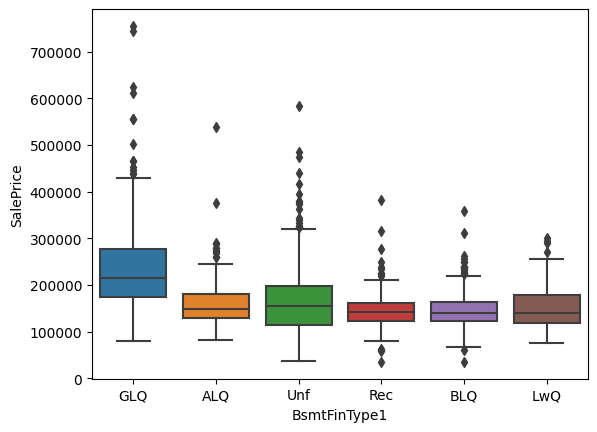

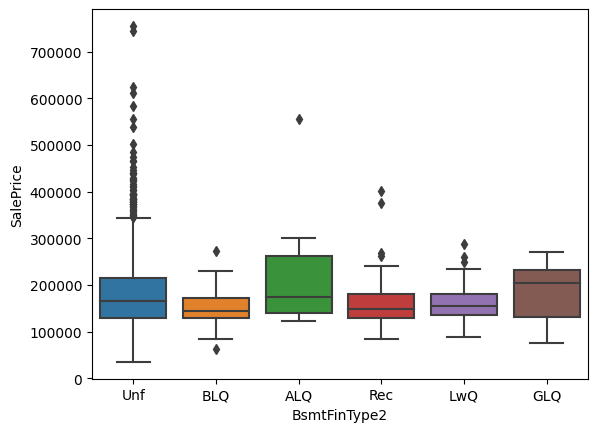

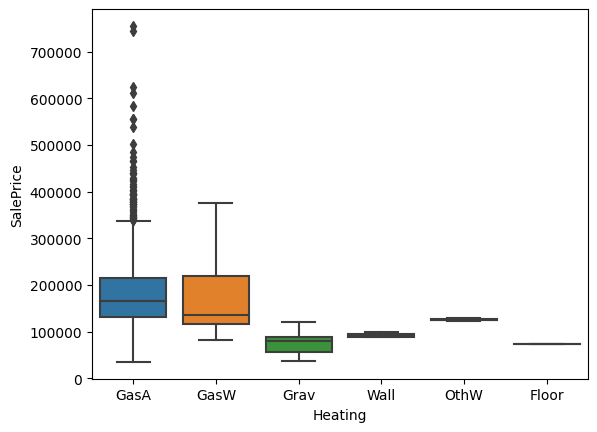

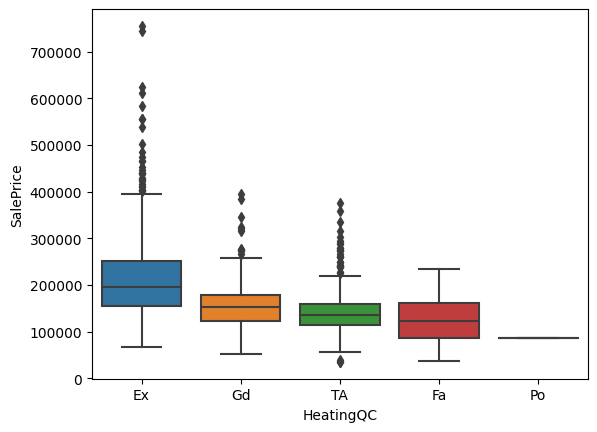

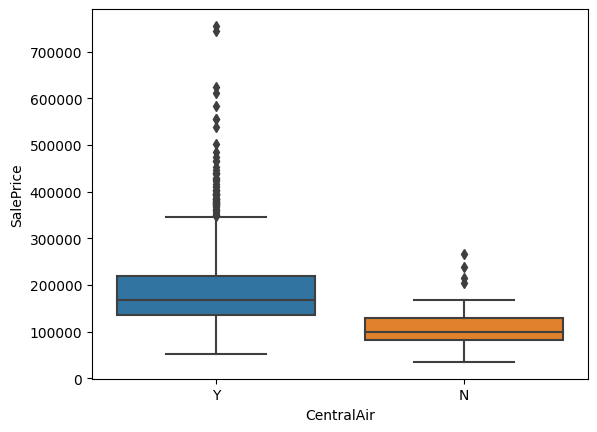

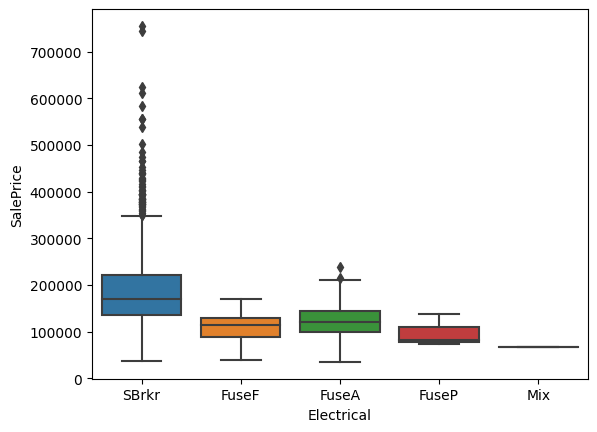

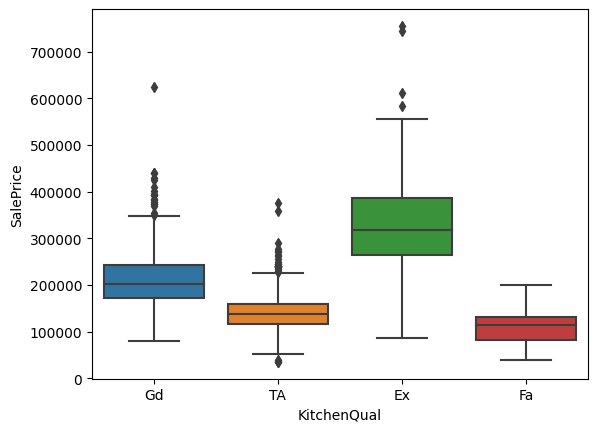

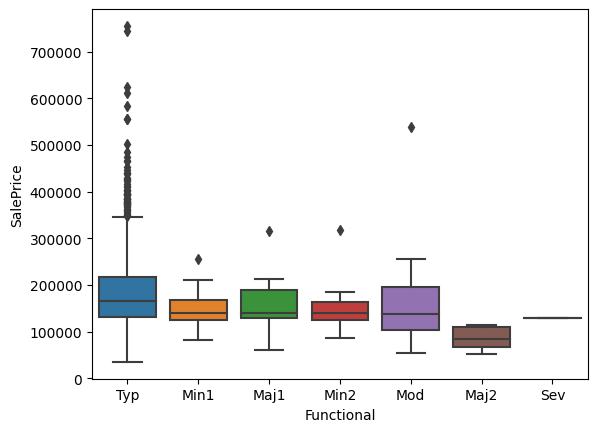

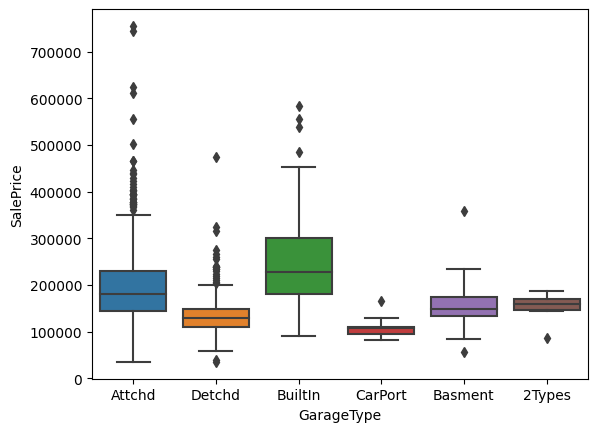

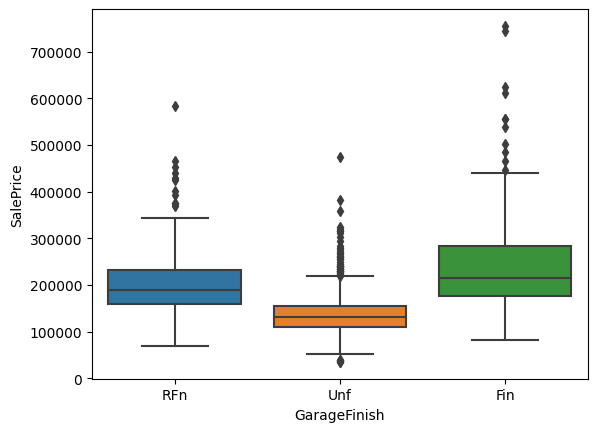

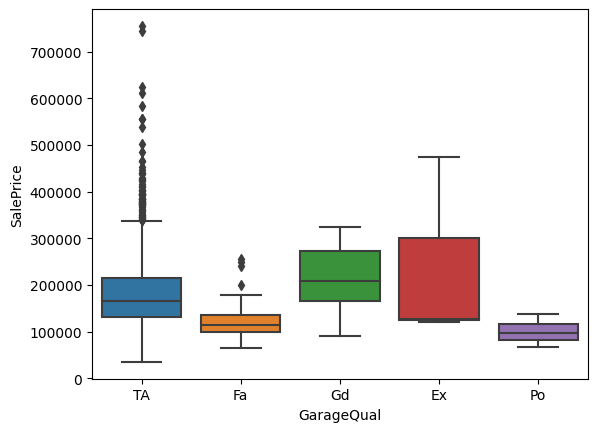

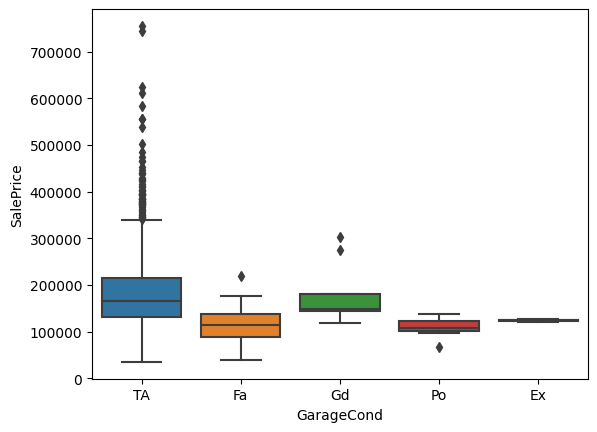

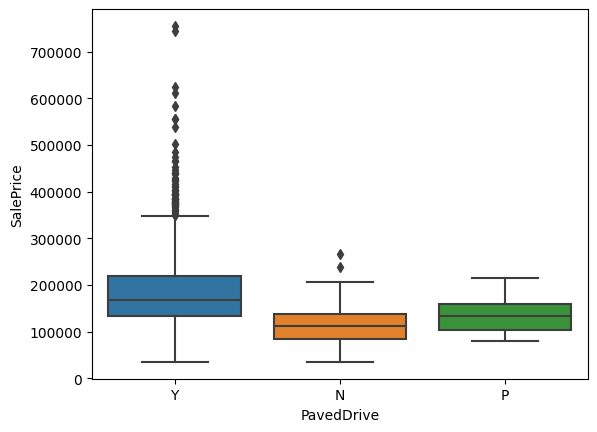

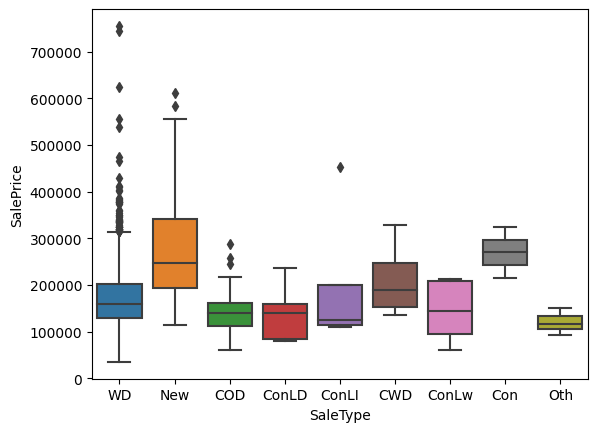

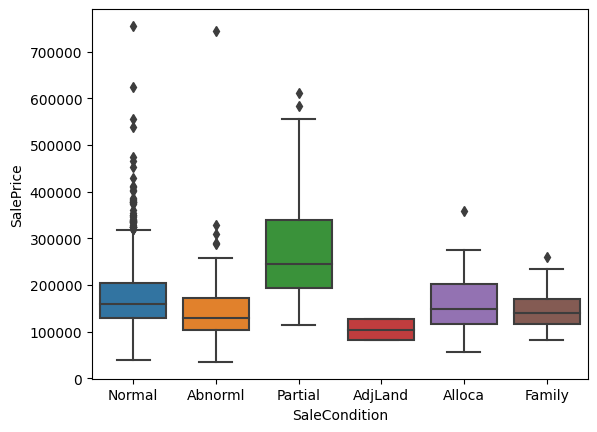

In [21]:
for i in df.columns:
    if df[i].dtype=="object":
        sns.boxplot(data=df,x=i,y="SalePrice")
        plt.show()

Almost all the categorical features are having some impact on the sale price 

#### Applying Machine Learning Framework to build Model for predicting the Sale Price of the House 

#### Preprocessing the training data 

In [22]:
df.columns

Index(['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive',
       'SaleType', 'SaleCondition', 'SalePrice'],
      dtype='object')

In [23]:
x=df[['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive',
       'SaleType', 'SaleCondition']] 


y=df["SalePrice"]

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(1168, 54) (1168,)
(292, 54) (292,)


In [25]:
x_train_num=x_train.select_dtypes(include="int64")
x_train_cat=x_train.select_dtypes(include="object")

In [26]:
#importing standard scaler class and encoder class
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder 

# creating scaler and encoder object
scaler=StandardScaler()
encoder=OneHotEncoder(handle_unknown="ignore",sparse_output=False)


In [27]:
x_train_num=scaler.fit_transform(x_train_num) 
x_train_cat=encoder.fit_transform(x_train_cat)

In [28]:
print(x_train_num.shape,x_train_cat.shape)

(1168, 17) (1168, 226)


In [29]:
x_train_num

array([[-0.86836547,  2.13150648, -0.51304058, ...,  1.5121838 ,
         0.60543808,  1.68363344],
       [-0.86836547, -0.79485211, -0.51304058, ..., -0.95117837,
        -0.95560314, -1.05711061],
       [-0.63114155, -0.79485211,  1.27838363, ..., -0.95117837,
        -0.95560314,  0.31326141],
       ...,
       [ 0.79220197, -0.06326246, -0.51304058, ...,  0.89634326,
        -0.95560314,  0.31326141],
       [ 1.50387373,  0.66832719, -0.51304058, ...,  0.28050271,
         0.60543808,  0.31326141],
       [ 0.08053021,  0.66832719, -0.51304058, ...,  0.28050271,
        -0.95560314,  0.31326141]])

In [30]:
x_train_cat

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [31]:
x_train_new=np.hstack((x_train_num,x_train_cat))
x_train_new

array([[-0.86836547,  2.13150648, -0.51304058, ...,  0.        ,
         0.        ,  1.        ],
       [-0.86836547, -0.79485211, -0.51304058, ...,  0.        ,
         1.        ,  0.        ],
       [-0.63114155, -0.79485211,  1.27838363, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 0.79220197, -0.06326246, -0.51304058, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.50387373,  0.66832719, -0.51304058, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.08053021,  0.66832719, -0.51304058, ...,  0.        ,
         1.        ,  0.        ]])

#### Preprocessing the test data 

In [32]:
x_test_num=x_test.select_dtypes(include="int64")
x_test_cat=x_test.select_dtypes(include="object")

In [33]:
#using same encoder and scaler to transform test features
x_test_num=scaler.transform(x_test_num)
x_test_cat=encoder.transform(x_test_cat) 



In [34]:
x_test_new=np.hstack((x_test_num,x_test_cat))
x_test_new

array([[-0.86836547, -0.06326246, -2.30446479, ...,  0.        ,
         0.        ,  0.        ],
       [-0.15669371, -0.06326246,  1.27838363, ...,  0.        ,
         1.        ,  0.        ],
       [-0.15669371, -0.79485211, -1.40875269, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.15669371, -0.06326246,  1.27838363, ...,  1.        ,
         0.        ,  0.        ],
       [-0.63114155, -1.52644176,  1.27838363, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.43636609, -0.79485211,  1.27838363, ...,  0.        ,
         1.        ,  0.        ]])

#### Building The Linear Regression Model

In [36]:
from sklearn.linear_model import LinearRegression 

model=LinearRegression()
model.fit(x_train_new,y_train) 






LinearRegression()

#### Making Predictions 

In [37]:
y_test_pred=model.predict(x_test_new)

#### Model Evaluation 

In [38]:
from sklearn import metrics
mae=metrics.mean_absolute_error(y_test,y_test_pred) 

print("The mean absolute error is ",mae)

The mean absolute error is  36898812912319.44
